<ipython-input-5-6734acf032a5>:82: RuntimeWarning: invalid value encountered in divide
  Selfk2 = np.where(mask, 1 * SelfK1, SelfK1 + CC * (Pi2 - Pi1) / (Pi2 + Pi1))


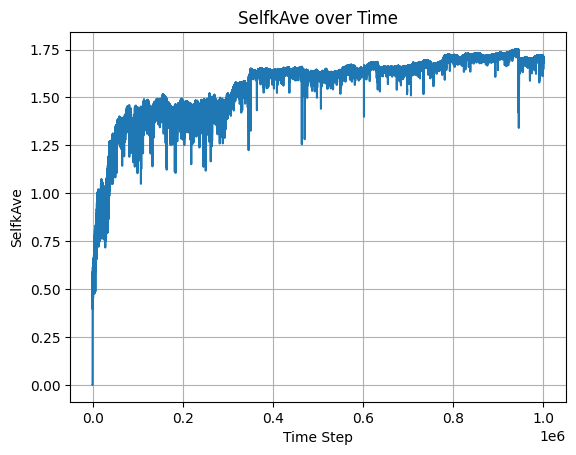

In [5]:
# Korosh Mahmoodi. This code transfered to Python from SOTC.m Matlab code using ChatGPT.
# Mahmoodi, Korosh, Bruce J. West, and Paolo Grigolini. "Self-organizing complex networks: individual versus global rules." Frontiers in physiology 8 (2017): 478.



import numpy as np
import random
import matplotlib.pyplot as plt

TimeStep = int(1e6)  # number of trials; simulation length
s = 0  # b < s + 1
b = 1.5  # b = 1 + 0.5 i.e. temptation to cheat is 0.5
K0 = 0  # initial value of the control parameter of the agents
CC = 0.25  # \khi parameter for updating the control parameter of the agents (K values); connecting the two last payoffs (feedback) to the change of the agent's control parameter
g000 = 0.1  # parameter of the decision-making rates
MM = 5  # number of agents on the x-axis of the 2D lattice
NN = 7  # number of agents on the y-axis of the 2D lattice
Selfk1010 = np.zeros(TimeStep)  # k value of one of the agents
SelfkAve = np.zeros(TimeStep)  # average of the k values
X = np.zeros(TimeStep)  # mean field (considering states C as +1 and D as -1)
PiT = np.zeros(TimeStep)  # average benefit of the agents at each trial
SelfK1 = np.zeros((MM, NN))  # previous k values of the agents
Selfk2 = np.zeros((MM, NN))  # updated k values of the agents
Pi1 = np.zeros((MM, NN))  # previous payoffs values of the agents
Pi2 = np.zeros((MM, NN))  # updated payoffs of the agents
Decision = np.zeros((MM, NN), dtype=int)  # decisions of the agents (C as 1 and D as 0)
g = np.zeros((MM, NN), dtype=int)  # number of neighbors of agents at state C (1)

for ti in range(1, TimeStep):
    Alt2 = 0
    Self2 = 0
    for ii in range(MM):
        for j1 in range(NN):
            if Decision[ii, j1] == 1:
                Alt2 += 1
            if Decision[ii, j1] == 0:
                Self2 += 1
    X[ti] = (Alt2 - Self2) / (MM * NN)

    # Counting 4 Neighbors
    g[1:MM - 1, 1:NN - 1] = Decision[0:MM - 2, 1:NN - 1] + Decision[2:MM, 1:NN - 1] + Decision[1:MM - 1, 0:NN - 2] + Decision[1:MM - 1, 2:NN]

    g[1:MM - 1, 0] = Decision[0:MM - 2, 0] + Decision[2:MM, 0] + Decision[1:MM - 1, NN - 1] + Decision[1:MM - 1, 1]
    g[1:MM - 1, NN - 1] = Decision[0:MM - 2, NN - 1] + Decision[2:MM, NN - 1] + Decision[1:MM - 1, NN - 2] + Decision[1:MM - 1, 0]
    g[0, 1:NN - 1] = Decision[MM - 1, 1:NN - 1] + Decision[1, 1:NN - 1] + Decision[0, 0:NN - 2] + Decision[0, 2:NN]
    g[MM - 1, 1:NN - 1] = Decision[MM - 2, 1:NN - 1] + Decision[0, 1:NN - 1] + Decision[MM - 1, 0:NN - 2] + Decision[MM - 1, 2:NN]

    g[0, 0] = Decision[MM - 1, 0] + Decision[1, 0] + Decision[0, NN - 1] + Decision[0, 1]
    g[MM - 1, 0] = Decision[MM - 2, 0] + Decision[0, 0] + Decision[MM - 1, NN - 1] + Decision[MM - 1, 1]
    g[0, NN - 1] = Decision[MM - 1, NN - 1] + Decision[1, NN - 1] + Decision[0, NN - 2] + Decision[0, 0]
    g[MM - 1, NN - 1] = Decision[MM - 2, NN - 1] + Decision[0, NN - 1] + Decision[MM - 1, NN - 2] + Decision[MM - 1, 0]

    # Prisoner's Dilemma GAME
    G = g.copy()
    G[Decision == 1] = G[Decision == 1] * (1) + (4 - G[Decision == 1]) * (-s)
    G[Decision == 0] = G[Decision == 0] * (b)
    Pi2 = G

    PiT[ti] = np.mean(Pi2)


    # New Decision DMM
    g0 = g.copy()
    kc = SelfK1.copy()
    BBBB = np.exp(kc * (1 - 0.5 * g0))
    a1to0 = g000 * BBBB
    a0to1 = g000 / BBBB

    r = np.random.rand(*a1to0.shape)
    Decision[np.logical_and(Decision == 1, r <= a1to0)] = 0
    r = np.random.rand(*a0to1.shape)
    Decision[np.logical_and(Decision == 0, r <= a0to1)] = 1



    SelfkAv = np.sum(SelfK1)
    SelfkAve[ti] = SelfkAv / (MM * NN)
    Selfk1010[ti] = SelfK1[1, 1]

    # New K
    mask = Pi1 == Pi2
    Selfk2 = np.where(mask, 1 * SelfK1, SelfK1 + CC * (Pi2 - Pi1) / (Pi2 + Pi1))
    mask = (Selfk2 <= 0) | (g000 * np.exp(Selfk2) > 1) | (g000 / np.exp(Selfk2) > 1)
    Selfk2[mask] = SelfK1[mask]

        # Changing old parameters with new ones
    SelfK1 = Selfk2.copy()
    Pi1 = Pi2.copy()

plt.plot(SelfkAve)
plt.xlabel('Time Step')
plt.ylabel('SelfkAve')
plt.title('SelfkAve over Time')
plt.grid(True)
plt.show()
